In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tweetskashmir.csv')

In [3]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [5]:
sw = set(stopwords.words('english'))
ps = PorterStemmer()

In [9]:
def clean_text(sample):
    sample = sample.lower()
    sample = sample.replace("rt", "")
    sample = sample.replace("@", "")
    #sample = re.sub("[^a-zA-Z]+", " ", sample)
    
    sample = sample.split()
    
    sample = [ps.stem(s) for s in sample if s not in sw] 
    
    sample = " ".join(sample)
    
    return sample

In [10]:
df['cleaned_text'] =  df['text'].apply(clean_text)

In [11]:
df.head()

,Unnamed: 0,text,cleaned_text
0,0,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,shamsirfan27: new normal #kashmir: armi men st...
1,1,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,shamsirfan27: new normal #kashmir: armi men st...
2,2,RT @PTIofficial: Arundhati Roy isn’t much wron...,ptiofficial: arundhati roy isn’t much wrong ca...
3,3,RT @zari_pakistani: Kashmiris Use Memes to Moc...,zari_pakistani: kashmiri use meme mock governm...
4,4,RT @Husnain4s_: 200+ days of lockdown in #Kash...,husnain4s_: 200+ day lockdown #kashmir. hidden...


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [16]:
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)  #Calling the polarity analyzer
    print("{:-<40} {}".format(sentence, str(snt)))

In [21]:
i=0 #counter

compval1 = [ ]  #empty list to hold our computed 'compound' VADER scores


while (i<len(df)):

    k = analyser.polarity_scores(df.iloc[i]['cleaned_text'])
    compval1.append(k['compound'])
    
    i = i+1
    
#converting sentiment values to numpy for easier usage

compval1 = np.array(compval1)

len(compval1)

23402

In [22]:
df['VADER score'] = compval1

In [23]:
df.head()

,Unnamed: 0,text,cleaned_text,VADER score
0,0,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,shamsirfan27: new normal #kashmir: armi men st...,-0.2960
1,1,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,shamsirfan27: new normal #kashmir: armi men st...,-0.2960
2,2,RT @PTIofficial: Arundhati Roy isn’t much wron...,ptiofficial: arundhati roy isn’t much wrong ca...,-0.6486
3,3,RT @zari_pakistani: Kashmiris Use Memes to Moc...,zari_pakistani: kashmiri use meme mock governm...,-0.8481
4,4,RT @Husnain4s_: 200+ days of lockdown in #Kash...,husnain4s_: 200+ day lockdown #kashmir. hidden...,0.3612


In [24]:
i = 0

predicted_value = [ ] #empty series to hold our predicted values

while(i<len(df)):
    if ((df.iloc[i]['VADER score'] >= 0.05)):
        predicted_value.append('positive')
        i = i+1
    elif ((df.iloc[i]['VADER score'] > -0.05) & (df.iloc[i]['VADER score'] < 0.05)):
        predicted_value.append('neutral')
        i = i+1
    elif ((df.iloc[i]['VADER score'] <= -0.05)):
        predicted_value.append('negative')
        i = i+1

In [25]:
df['predicted sentiment'] = predicted_value

In [26]:
df.head()

,Unnamed: 0,text,cleaned_text,VADER score,predicted sentiment
0,0,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,shamsirfan27: new normal #kashmir: armi men st...,-0.2960,negative
1,1,RT @ShamsIrfan27: A new normal in #Kashmir: ar...,shamsirfan27: new normal #kashmir: armi men st...,-0.2960,negative
2,2,RT @PTIofficial: Arundhati Roy isn’t much wron...,ptiofficial: arundhati roy isn’t much wrong ca...,-0.6486,negative
3,3,RT @zari_pakistani: Kashmiris Use Memes to Moc...,zari_pakistani: kashmiri use meme mock governm...,-0.8481,negative
4,4,RT @Husnain4s_: 200+ days of lockdown in #Kash...,husnain4s_: 200+ day lockdown #kashmir. hidden...,0.3612,positive


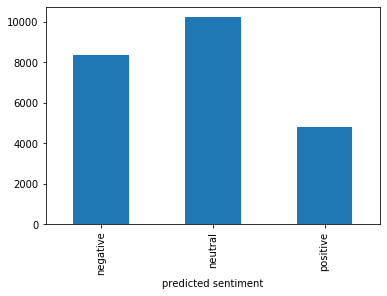

In [28]:
df.groupby('predicted sentiment').size().plot(kind='bar')

In [33]:
df['predicted sentiment'].value_counts()

neutral     10239
negative     8381
positive     4782
Name: predicted sentiment, dtype: int64

In [34]:
import seaborn as sns

In [41]:
s = pd.Series(df['predicted sentiment'])
l = s.values.tolist()
type(l)

list

In [44]:
z = df.groupby('predicted sentiment').size()

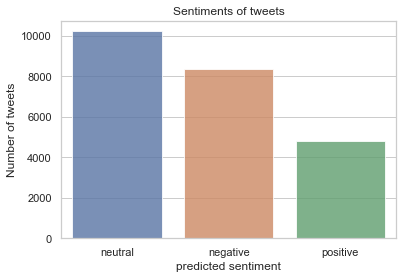

In [51]:
sent_count = df['predicted sentiment'].value_counts()
sns.barplot(sent_count.index, sent_count.values,alpha=0.8)
plt.title('Sentiments of tweets')
plt.ylabel('Number of tweets', fontsize=12)
plt.xlabel('predicted sentiment', fontsize=12)
plt.show()